In [9]:
import pandas as pd
import urllib.request as ur
import numpy as np
import sklearn.cross_validation as skc
import sklearn.neighbors as skn

In [254]:
import sklearn as sk
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import collections as cn
import operator

In [11]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
flower = pd.read_csv('/Users/yisongdong/Desktop/MSF&Python/Learning Python/Machine Learning/Data/iris.data.txt', header=None, names=names)
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# scikit-learn requires that the design matrix X and target vector y be numpy arrays so let’s oblige. 
# Furthermore, we need to split our data into training and test sets. The following code does just that.
X = np.array(flower.iloc[:, 0:4])
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [13]:
Y = np.array(flower['class'])

In [17]:
X_train, X_test, Y_train, Y_test = skc.train_test_split(X, Y, test_size=0.33, random_state=42)

sklearn.model_selection.train_test_split() function can split data into train and test set.
Parameter1--test_size, can be a interger (absolute number of train data), or folat (fraction of train data)
Parameter2--train_size, same as test_size
Parameter3--random_state, an integer, set the seed
Parameter4--shuffle, boolean, wheter or not shuffle the data before split

In [20]:
flowers_knn=skn.KNeighborsClassifier(n_neighbors=3)
flowers_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)---Classifier implementing the k-nearest neighbors vote.

Explanantion of parameters

Parameter1--weights: uniform, distance (weighted by distance), or a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

Parameter2--algorithm: auto, ball_tree, kd_tree, brute

Parameter3--p: when p=1, use Manhattan Distance, when p=2, use Euclidean Distance

In [22]:
pred = flowers_knn.predict(X_test)
pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [23]:
# Compare prediction and Y_test to get the accuracy
print(sk.metrics.accuracy_score(Y_test, pred))

0.98


accuracy_score(y_true, y_predict, normalize=boolean, sample_weight=array-like shape)

If normalize = False, will return the absolute number of accuracy, else return the fraction of accuracy.

In [25]:
# Find the best K

# Create a list of K (K in K neighbors, not k-fold)
KList = list(range(1,50))

OddK = filter(lambda x: x%2!=0, KList)

scores=[]
for K in OddK:
    flowers_knn = skn.KNeighborsClassifier(n_neighbors=K)
    flowers_knn.fit(X_train, Y_train)
    pred = flowers_knn.predict(X_test)
    scores.append(sk.metrics.accuracy_score(Y_test, pred))
    
scores

[0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97999999999999998,
 1.0,
 1.0,
 1.0,
 0.95999999999999996,
 0.95999999999999996,
 0.95999999999999996,
 0.93999999999999995,
 0.93999999999999995,
 0.93999999999999995]

In [27]:
# Use Cross Validation find the best K-neighbor

KList = list(range(1,50))

OddK = list(filter(lambda x: x%2!=0, KList))

cv_scores=[]
for K in OddK:
    flowers_knn = skn.KNeighborsClassifier(n_neighbors=K)
    scores = skm.cross_val_score(flowers_knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.94252525252525265,
 0.94328282828282828,
 0.95161616161616158,
 0.95252525252525255,
 0.94419191919191925,
 0.94252525252525265,
 0.93419191919191924,
 0.94252525252525265,
 0.94252525252525265,
 0.94252525252525265,
 0.94252525252525265,
 0.93141414141414158,
 0.95050505050505052,
 0.91212121212121211,
 0.90919191919191922,
 0.89101010101010103,
 0.90010101010101029,
 0.90919191919191922,
 0.90010101010101029,
 0.89176767676767688,
 0.90287878787878795,
 0.89176767676767688,
 0.88267676767676773,
 0.88267676767676784,
 0.87156565656565665]

In [28]:
MSE = [1 - x for x in cv_scores]
MSE

[0.057474747474747345,
 0.056717171717171722,
 0.048383838383838418,
 0.047474747474747447,
 0.055808080808080751,
 0.057474747474747345,
 0.06580808080808076,
 0.057474747474747345,
 0.057474747474747345,
 0.057474747474747345,
 0.057474747474747345,
 0.068585858585858417,
 0.049494949494949481,
 0.08787878787878789,
 0.090808080808080782,
 0.10898989898989897,
 0.09989898989898971,
 0.090808080808080782,
 0.09989898989898971,
 0.10823232323232312,
 0.097121212121212053,
 0.10823232323232312,
 0.11732323232323227,
 0.11732323232323216,
 0.12843434343434335]

In [29]:
optimal_k = OddK[MSE.index(min(MSE))]
optimal_k

7

index() method finds the given element in a list and returns its position

In [30]:
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


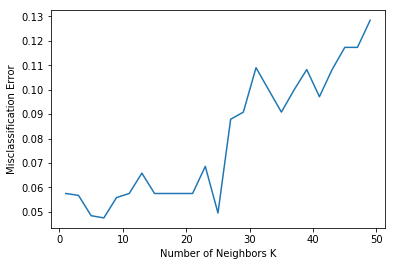

In [31]:
plt.plot(OddK, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [32]:
# Create our own KNN algorithm
# All variables need to be numpy array to realize this function
def KnnPredict(X_train, Y_train, Xi_test, K):
    distances = []
    targets = []
    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(X_train[i,:]-Xi_test)))
        distances.append([i,distance])
    distances.sort(key = lambda x: x[1])
    for i in range(K):
        target = Y_train[distances[i][0]]
        targets.append(target)
    return cn.Counter(targets).most_common(1)[0][0]

A Counter is a container that keeps track of how many times equivalent values are added.

The Counter.most_common( ) function returns [The most common elements, times appear], so [0][0] just chooses 'which is the most common elements'. 

In [33]:
# When the list is a numpy array, the calculation will be realized:
a=np.array([9,12,2,3])
b=np.array([5,7,9,5])
l = np.square(a-b)
np.sum(np.square(a-b))

94

In [34]:
K=7
predictions=[]
for i in X_test:
    predictions.append(KnnPredict(X_train, Y_train, i, K))

In [35]:
predictions=np.asarray(predictions)

In [36]:
accuracy = sk.metrics.accuracy_score(Y_test,predictions)
accuracy

0.97999999999999998

In [37]:
# check if k larger than n
# We can use raise/try/except module
preds=[]
K=9
if K > len(X_train):
    raise ValueError
for i in X_test:
    try:
        preds.append(KnnPredict(X_train, Y_train, i, K))
    except ValueError:
        print('Can\'t have more neighbors than training samples!!')

accuracy = sk.metrics.accuracy_score(Y_test, preds)
print('\nThe accuracy of OUR classifier is %d%%' % accuracy)
accuracy


The accuracy of OUR classifier is 0%


0.97999999999999998

In [38]:
# Another form algo of KNN

# some numpy functions:

# 1) Create matrix and find the size
npm=np.matrix('2,3,4;5,6,7;35,635,3')
npm.shape

(3, 3)

In [39]:
# 2) Make replications of number
rep = np.tile(77,10)
rep

array([77, 77, 77, 77, 77, 77, 77, 77, 77, 77])

In [40]:
# 3) Make replications of matrix
rep1 = np.tile(npm,(3,2))
rep1

matrix([[  2,   3,   4,   2,   3,   4],
        [  5,   6,   7,   5,   6,   7],
        [ 35, 635,   3,  35, 635,   3],
        [  2,   3,   4,   2,   3,   4],
        [  5,   6,   7,   5,   6,   7],
        [ 35, 635,   3,  35, 635,   3],
        [  2,   3,   4,   2,   3,   4],
        [  5,   6,   7,   5,   6,   7],
        [ 35, 635,   3,  35, 635,   3]])

In [41]:
rep2 = np.tile(npm,(3,1))
rep2

matrix([[  2,   3,   4],
        [  5,   6,   7],
        [ 35, 635,   3],
        [  2,   3,   4],
        [  5,   6,   7],
        [ 35, 635,   3],
        [  2,   3,   4],
        [  5,   6,   7],
        [ 35, 635,   3]])

In [42]:
rep3 = np.tile(npm,3)
rep3

matrix([[  2,   3,   4,   2,   3,   4,   2,   3,   4],
        [  5,   6,   7,   5,   6,   7,   5,   6,   7],
        [ 35, 635,   3,  35, 635,   3,  35, 635,   3]])

In [45]:
npm1=np.matrix('32,42,542;13,635,12;65,324,534')
dif = npm1-npm
dif

matrix([[  30,   39,  538],
        [   8,  629,    5],
        [  30, -311,  531]])

In [46]:
dif.sum(axis=1)
ff = dif.sum(axis=0)
ff.argsort()

matrix([[0, 1, 2]])

The smallest number is the second one in 'ff', the second smallest is the first one in 'ff', and the largest is the last one in 'ff'

In [47]:
dif@dif
dif*dif
dif**2
np.multiply(dif,dif)

matrix([[   900,   1521, 289444],
        [    64, 395641,     25],
        [   900,  96721, 281961]])

In [78]:
# A new KNN function:
def KNNPredict1(X_train, X_test, Y_train, K):
    # find how many rows of X_train
    X_train_size = X_train.shape[0]
    # X_test is only one row, repeat it X_train_size times and subtract X_train to get the distances between X_test and each data in X_train
    distance_matrix = np.tile(X_test,(X_train_size,1))-X_train
    # np.multiply() is the element-wise multiplication
    sq_distance_matrix = np.multiply(distance_matrix,distance_matrix)
    sum_distance_array = sq_distance_matrix.sum(axis=1)
    # np.sqrt() is the element-wise square root
    distance_array=np.sqrt(sum_distance_array)
    # this is the array of the rank from nearest to farest distance
    sort_dis_indices = distance_array.argsort()
    ClassCount={}
    for i in range(K):
        VoteClass = Y_train[sort_dis_indices[i]]
        ClassCount[VoteClass]=ClassCount.get(VoteClass,0)+1
    SortedClassCount = sorted(ClassCount.items(), key=operator.itemgetter(1), reverse=True)
    return SortedClassCount[0][0]

In [76]:
def CalculateScore(X_test, Y_test, K):
    predictions1=[]
    for x in X_test:
        predictions1.append(KNNPredict1(X_train, x, Y_train, K))
    return sk.metrics.accuracy_score(Y_test, predictions1)

aaaxoxo loee xoxo
aaaxoxo l


In [81]:
KScore=[]
for K in OddK:
    KScore.append(CalculateScore(X_test, Y_test, K))
KScore

[0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 0.97999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97999999999999998,
 1.0,
 1.0,
 1.0,
 0.95999999999999996,
 0.95999999999999996,
 0.95999999999999996,
 0.93999999999999995,
 0.93999999999999995,
 0.93999999999999995]

In [57]:
dd={'dh':15,'e':8,'g':34,'ef':64,'we':64}
dd.items()
sorted(dd.items(), key=operator.itemgetter(1), reverse=True)[0][0]

'ef'

In [ ]:
# Another Example

In [328]:
# 1) Parse Data
dating = open('/Users/yisongdong/Desktop/MSF&Python/Learning Python/Machine Learning/Data/DatingTestSet.txt')
NoOfLines=len(dating.readlines())
XStorageMat = np.zeros((NoOfLines,3))
YStorageMat = []

In [329]:
dating = open('/Users/yisongdong/Desktop/MSF&Python/Learning Python/Machine Learning/Data/DatingTestSet.txt')
index = 0
for line in dating.readlines():
    line = line.strip()
    ListFromLine = line.split('\t')
    XStorageMat[index] = ListFromLine[0:3]
    YStorageMat.append(ListFromLine[-1])
    index = index+1

In [323]:
# About strip():
string = 'aaaxoxo loee xoxo   '
print(string.strip())
print(string.strip(' xoe'))
# Search simultaneously from the head and trailing that if there is any elements in ' xoe', if there is, then delete it until the next element is not in ' xoe' 

aaaxoxo loee xoxo
aaaxoxo l


In [324]:
len(XStorageMat)
XStorageMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [239]:
YStorageMat = np.array(YStorageMat)
len(YStorageMat.T)
YStorageMat

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'smallDoses', 'largeDoses', 'smallDoses',
       'largeDoses', 'smallDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'smallDoses',
       'didntLike', 'didntLike', 'smallDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'didntLike', 'didntLike', 'didntLike', 'smallDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'smallDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'didntLike', 'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'lar

In [273]:
total_data = np.concatenate((XStorageMat, YStorageMat[:,None]), axis=1)
# np.concatenate() function can merge arrays/matrix
# We need to extend the second array into 2-dimension when use np.concatenate(), that's why we write YStorageMat[:,None]

for i in range(len(total_data[:,3])):
    if total_data[i,3]=='largeDoses':
        total_data[i,3]='red'
    elif total_data[i,3]=='smallDoses':
        total_data[i,3]='blue'
    else:
        total_data[i,3]='yellow'

total_data

array([['40920.0', '8.326976', '0.953952', 'largeDoses'],
       ['14488.0', '7.153469', '1.673904', 'smallDoses'],
       ['26052.0', '1.441871', '0.805124', 'didntLike'],
       ..., 
       ['26575.0', '10.650102', '0.866627', 'largeDoses'],
       ['48111.0', '9.134528', '0.728045', 'largeDoses'],
       ['43757.0', '7.882601', '1.332446', 'largeDoses']], 
      dtype='<U32')

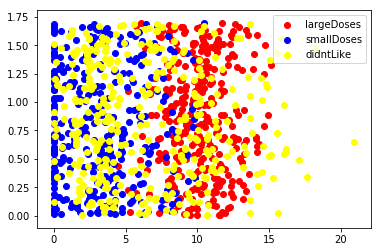

In [279]:
figNew, axNew = plt.subplots()
axNew.scatter(total_data[total_data[:,3]=='largeDoses',1], total_data[total_data[:,3]=='largeDoses',2], c='red', label='largeDoses')
axNew.scatter(total_data[total_data[:,3]=='smallDoses',1], total_data[total_data[:,3]=='smallDoses',2], c='blue', label='smallDoses')
axNew.scatter(total_data[total_data[:,3]=='didntLike',1], total_data[total_data[:,3]=='didntLike',2], c='yellow', label='didntLike')
axNew.legend()
plt.show()

In [330]:
# Rescale the first column number, flyer miles, which is too large:
MinMile = min(XStorageMat[:,0])
MaxMile = max(XStorageMat[:,0])
XStorageMatRescale = XStorageMat
XStorageMatRescale[:,0]=np.divide(np.subtract(XStorageMat[:,0],MinMile),MaxMile-MinMile)


In [331]:
XStorageMatRescale

array([[  0.44832535,   8.326976  ,   0.953952  ],
       [  0.15873259,   7.153469  ,   1.673904  ],
       [  0.28542943,   1.441871  ,   0.805124  ],
       ..., 
       [  0.29115949,  10.650102  ,   0.866627  ],
       [  0.52711097,   9.134528  ,   0.728045  ],
       [  0.47940793,   7.882601  ,   1.332446  ]])

In [341]:
X_train, X_test, Y_train, Y_test = skc.train_test_split(XStorageMatRescale, YStorageMat, test_size=0.33, random_state=111)

In [ ]:
kd = range(0,50)
for kdi in k[::2]:
    KNNPredict1(Xd_train, Xd_test, Yd_train, kdi)

In [340]:
k=range(0,50)
for i in k[1::2]:
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
